
Fonte http://sentinelhub-py.readthedocs.io/en/latest/examples/ogc_request.html#Imports
configuazione e import
la configurazione dell'applicazione deve essere fatta qui https://apps.sentinel-hub.com/configurator/#/


In [106]:
INSTANCE_ID = '1dea38a8-f0eb-4d2c-bc72-81a315227c9a'
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import datetime
from sentinelhub.data_request import WmsRequest, WcsRequest
from sentinelhub.constants import MimeType
from sentinelhub.common import BBox, CRS

Per disegnare l'immagine in colore RGB e mostrarla

In [107]:

def plot_image(data, factor=1):
    """
    Utility function for plotting RGB images. The numpy arrays returned by the WMS and WCS requests have channels
    ordered as Blue (`B02`), Green (`B03`), and Red (`B04`) therefore the order has to be reversed before ploting
    the image. http://sentinelhub-py.readthedocs.io/en/latest/examples/ogc_request.html#Imports comfiguration https://apps.sentinel-hub.com/configurator/#/configurations/1
    """
    fig = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))
    rgb = np.zeros(data.shape, dtype=np.float32)
    rgb[..., 0] = data[..., 2]
    rgb[..., 1] = data[..., 1]
    rgb[..., 2] = data[..., 0]
    plt.imshow(rgb*factor)

Definizione dell area geografica da monitorare

In [108]:
prato_coords_wgs84 = [43.9351, 11.0004, 43.8327, 11.1681]
prato_bbox = BBox(bbox=prato_coords_wgs84,crs=CRS.WGS84)

Configurazione della richiesta dei dati satellitari

In [109]:
wms_true_color_request = WmsRequest(data_folder='immagini',
                                    layer='TRUE-COLOR',
                                    bbox=prato_bbox,
                                    time=('2018-01-01', '2018-01-31'),
                                    width=1000, height=1000,
                                    maxcc=0.2,
                                    instance_id=INSTANCE_ID)

Richiedo i dati al servizio e li salvo in locale

In [110]:
wms_true_color_img = wms_true_color_request.get_data()
wms_bands_img = wms_true_color_request.save_data()

In [111]:
print('Ci sono %d immagini di Sentinel-2 disponibili con una copertura nuvole inferiore al %1.0f%%.' % (len(wms_true_color_img), wms_true_color_request.maxcc * 100.0))

Ci sono 1 immagini di Sentinel-2 disponibili con una copertura nuvole inferiore al 20%.


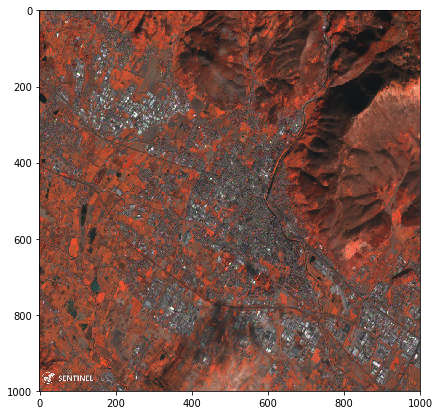

In [112]:
plot_image(wms_true_color_img[-1], 1./255)

In [113]:
print('Le %d immagini prelevate hanno queste date:' % len(wms_true_color_img))
for index, date in enumerate(wms_true_color_request.get_dates()):
    print(' - image %d was taken on %s' % (index, date))

Le 1 immagini prelevate hanno queste date:
 - image 0 was taken on 2018-01-24 10:13:52
